<a href="https://colab.research.google.com/github/gaurangbharti1/NLP_Exploratory_Data_Analysis/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [ ]:
pip install pyldavis

     |████████████████████████████████| 1.7MB 5.8MB/s 
  Created wheel for pyldavis: filename=pyLDAvis-3.2.1-py2.py3-none-any.whl size=136161 sha256=1e8dd05ddf7586f207dc7d90fe1ae9e29690a668c765ba3a0a51fb102e84ef89
  Stored in directory: /root/.cache/pip/wheels/2f/cc/af/144c01e23fff8c11ef26e2fa161d98b7c2ae8c9a4f5cc48c2e
Successfully built pyldavis


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import collections
import seaborn as sns
import gensim
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
import pyLDAvis.gensim
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

In [5]:
dataset = pd.read_csv("abcnews-date-text.csv")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


<BarContainer object of 3 artists>

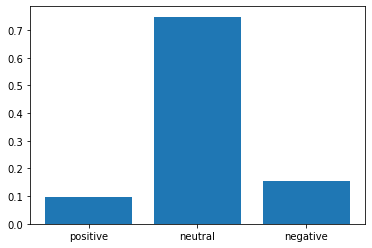

In [8]:
content = dataset.headline_text.tolist()

nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()


compound = []
neg = []
pos = []
neu = []

x = 0
while x < 100000:
    temp = sia.polarity_scores(content[x])
    neg.append(temp["neg"])
    pos.append(temp["pos"])
    neu.append(temp["neu"])
    compound.append(temp["compound"])
    x = x+1

#print(compound)

avg_compound = sum(compound)/len(compound)

avg_pos = sum(pos)/len(pos)

avg_neg = sum(neg)/len(neg)

avg_neu = sum(neu)/len((neu))

data = [avg_pos,  avg_neu, avg_neg]

plt.bar(["positive","neutral", "negative" ], data)

In [9]:

content = dataset['headline_text']

content2 = content[:100000]

nltk.download([
    "names",
    "stopwords",
    "punkt",
    "wordnet"
  ])

#Medium article content
#Needs to get abstracted

def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)



[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


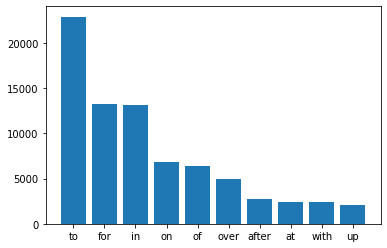

In [10]:
plot_top_stopwords_barchart(content2)

In [11]:

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=collections.Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)


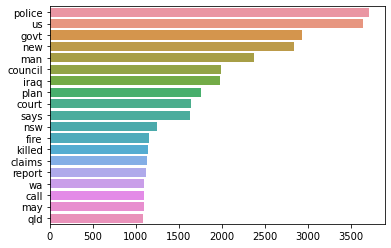

In [12]:
plot_top_non_stopwords_barchart(content2)

In [13]:

def get_lda_objects(text):
    nltk.download('stopwords')    
    stop=set(stopwords.words('english'))

    
    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    dic=gensim.corpora.Dictionary(corpus)
    bow_corpus = [dic.doc2bow(doc) for doc in corpus]
    
    lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 4, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
    
    return lda_model, bow_corpus, dic


In [14]:
def plot_lda_vis(lda_model, bow_corpus, dic):
    pyLDAvis.enable_notebook(local=True)
    vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)
    return vis

In [ ]:
lda_model, bow_corpus, dic = get_lda_objects(content2)

lda_model.show_topics()

plot_lda_vis(lda_model, bow_corpus, dic)

In [16]:

def plot_wordcloud(text):
    nltk.download('stopwords')
    stop=set(stopwords.words('english'))

    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=100,
        max_font_size=30, 
        scale=3,
        random_state=1)
    
    wordcloud=wordcloud.generate(str(corpus))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
 
    plt.imshow(wordcloud)
    plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


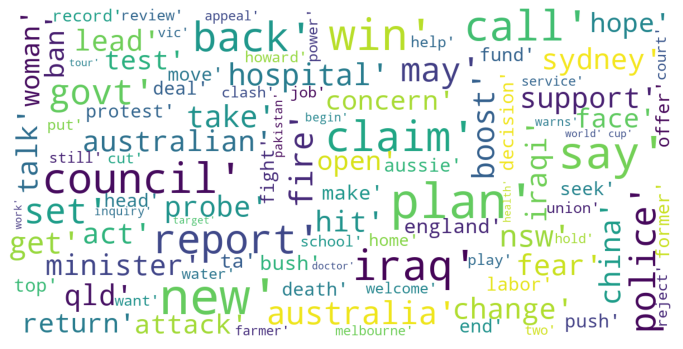

In [17]:
plot_wordcloud(content2)

In [18]:
subjectivity = []

x = 0

while x < len(content2) :
    subjectivity.append(TextBlob(content2[x]).sentiment[1])
    x=x+1

print(sum(subjectivity)/len(subjectivity))

0.1477604845391668
